## Argo floats in an area

Let's use, as an example, with the most recent data from August 202
It is pre-downloaded in the ./Data folder, but you can download it from the Coriolis GDAC [See here for instructions on how to download the data](https://euroargodev.github.io/argoonlineschool/Lessons/L03_UsingArgoData/Chapter30_UsingArgoData_intro.html#data-used-in-the-argo-online-school)

First, import the libraries

In [36]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

load all the platforms in the fist of september

In [63]:
file='../../Data/202509-ArgoData/geo/atlantic_ocean/2025/09/20250901_prof.nc'
DS=xr.open_dataset(file)

In [64]:
WMOs=np.array([])
DACs=np.array([])
LONs=np.array([])
LATs=np.array([])
for iday in range(1,31):
    filein=f"../../Data/202509-ArgoData/geo/atlantic_ocean/2025/08/202508{iday:02d}_prof.nc"
    DS=xr.open_dataset(filein)
    #look for the WMO and DAC for each float
    LONs=np.append(LONs,DS.LONGITUDE.values)
    LATs=np.append(LATs,DS.LATITUDE.values)
    DACs=np.append(DACs,DS.DATA_CENTRE.astype(str).values)
    WMOs=np.append(WMOs,DS.PLATFORM_NUMBER.astype(int).values)

#Keep just the unique set of WMOs
WMOs, indices = np.unique(WMOs, return_index=True)
DACs=DACs[indices]
LONs=LONs[indices]
LATs=LATs[indices]

In [70]:
print(f"In all the ocean during september 1st 2025 {WMOs.shape[0]} Argo floats where active:")
for ip in range(0,WMOs.shape[0],100):
    print(f"{ip:03d} WMO {WMOs[ip]:7.0f} DAC {DACs[ip]} ...")

In all the ocean during september 1st 2025 1264 Argo floats where active:
000 WMO 1901814 DAC AO ...
100 WMO 1902404 DAC AO ...
200 WMO 1902790 DAC AO ...
300 WMO 3901686 DAC IF ...
400 WMO 3902590 DAC IF ...
500 WMO 4902574 DAC ME ...
600 WMO 4903268 DAC AO ...
700 WMO 4903634 DAC IF ...
800 WMO 5906488 DAC AO ...
900 WMO 6902895 DAC IF ...
1000 WMO 6903826 DAC IF ...
1100 WMO 6990557 DAC AO ...
1200 WMO 7901036 DAC IF ...


lets focus just around the eastern mediterranean:

In [73]:
indice=np.where((LATs>25) & (LATs<42) & (LONs<50) & (LONs>10))
WMOs_area=WMOs[indice]
DACs_area=DACs[indice]

In [79]:
print(f"During november 2020 {WMOs_area.shape[0]} Argo floats where active in the selected area:")
for ip in range(0,WMOs_area.shape[0],1):
    print(f"{ip:02d} WMO {WMOs_area[ip]:7.0f} DAC {DACs_area[ip]}")

During november 2020 41 Argo floats where active in the selected area:
00 WMO 1902575 DAC coriolis
01 WMO 1902582 DAC coriolis
02 WMO 2903797 DAC coriolis
03 WMO 2903898 DAC coriolis
04 WMO 2903928 DAC coriolis
05 WMO 2904023 DAC coriolis
06 WMO 3902461 DAC coriolis
07 WMO 3902474 DAC coriolis
08 WMO 3902483 DAC coriolis
09 WMO 3902631 DAC coriolis
10 WMO 3902695 DAC coriolis
11 WMO 4903661 DAC coriolis
12 WMO 4903679 DAC coriolis
13 WMO 4903782 DAC coriolis
14 WMO 4903817 DAC coriolis
15 WMO 4903847 DAC coriolis
16 WMO 5906865 DAC coriolis
17 WMO 5906993 DAC coriolis
18 WMO 5907088 DAC coriolis
19 WMO 5907213 DAC coriolis
20 WMO 6903015 DAC coriolis
21 WMO 6903296 DAC coriolis
22 WMO 6903297 DAC coriolis
23 WMO 6903298 DAC coriolis
24 WMO 6903779 DAC coriolis
25 WMO 6903799 DAC coriolis
26 WMO 6903803 DAC coriolis
27 WMO 6903821 DAC coriolis
28 WMO 6903822 DAC coriolis
29 WMO 6903823 DAC coriolis
30 WMO 6903824 DAC coriolis
31 WMO 6903825 DAC coriolis
32 WMO 6903826 DAC coriolis
33 WM

And plot the usurfacing position of all these floats:

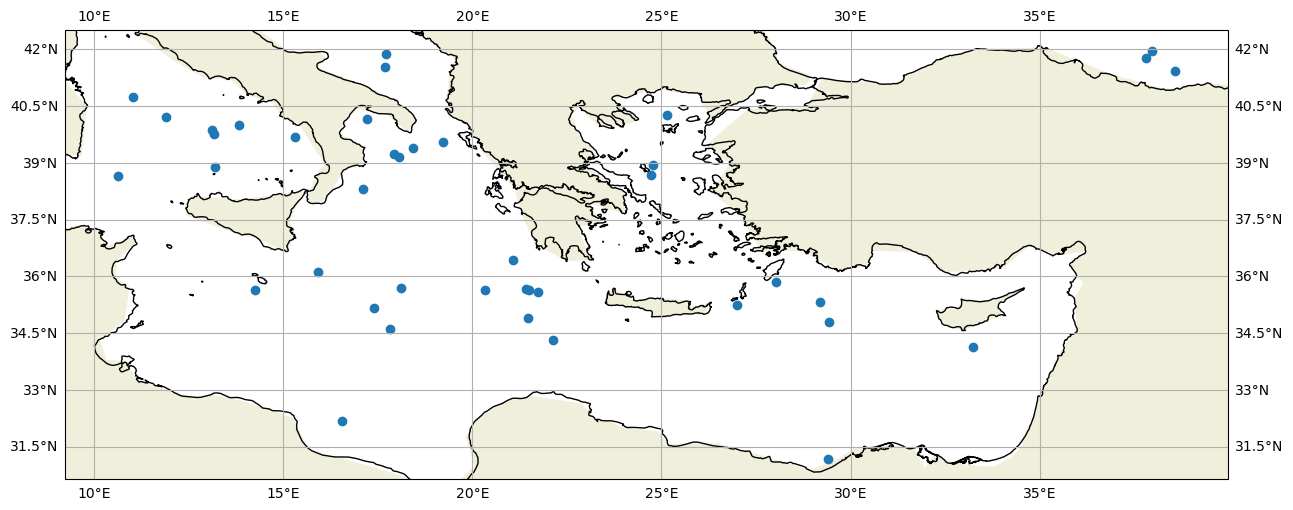

In [81]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

ax.plot(LONs[indice],LATs[indice],'o')

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

In [82]:
DACs_area=np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(np.char.replace(DACs_area, 
                     'IF','coriolis'),'BO','bodc'),'AO','aoml'),
                     'HZ','csio'),'CS','csiro'),'IN','incois'),'JA','jma'),'KM','kma'),
                     'KO','kordi'),'ME','meds'),'NM','nmdis')

here ate the file names with the profiles

In [77]:
for ip in range(0,WMOs_area.size):
    filein=f"../../Data/202509-ArgoData/dac/{DACs_area[ip]}/{WMOs_area[ip]:7.0f}/{WMOs_area[ip]:7.0f}_prof.nc"
    #filein=f"{WMOs_area[ip]:7.0f}"
    print(filein)

../../Data/202509-ArgoData/dac/coriolis/1902575/1902575_prof.nc
../../Data/202509-ArgoData/dac/coriolis/1902582/1902582_prof.nc
../../Data/202509-ArgoData/dac/coriolis/2903797/2903797_prof.nc
../../Data/202509-ArgoData/dac/coriolis/2903898/2903898_prof.nc
../../Data/202509-ArgoData/dac/coriolis/2903928/2903928_prof.nc
../../Data/202509-ArgoData/dac/coriolis/2904023/2904023_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902461/3902461_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902474/3902474_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902483/3902483_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902631/3902631_prof.nc
../../Data/202509-ArgoData/dac/coriolis/3902695/3902695_prof.nc
../../Data/202509-ArgoData/dac/coriolis/4903661/4903661_prof.nc
../../Data/202509-ArgoData/dac/coriolis/4903679/4903679_prof.nc
../../Data/202509-ArgoData/dac/coriolis/4903782/4903782_prof.nc
../../Data/202509-ArgoData/dac/coriolis/4903817/4903817_prof.nc
../../Data/202509-ArgoData/dac/coriolis/

I can also look at the surface tempearture duing august:

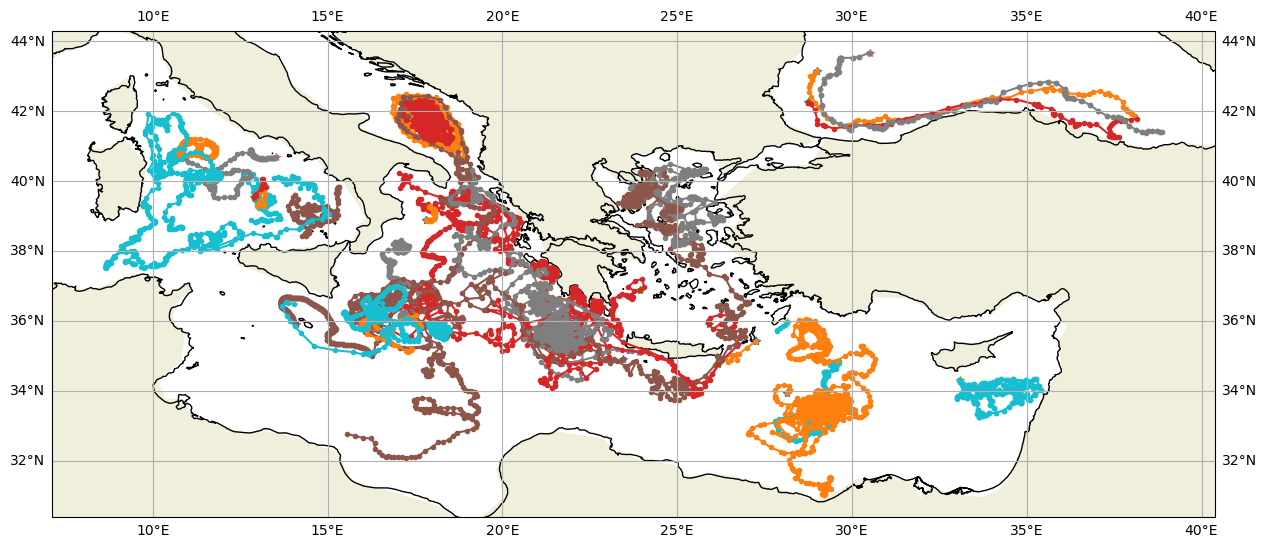

In [91]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

for ip in range(0,WMOs_area.size):
    filein=f"../../Data/202509-ArgoData/dac/{DACs_area[ip]}/{WMOs_area[ip]:7.0f}/{WMOs_area[ip]:7.0f}_prof.nc"
    DS=xr.open_dataset(filein)
    ax.plot(DS.LONGITUDE[0],DS.LATITUDE[0],'*',DS.LONGITUDE,DS.LATITUDE,'.-')

ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()


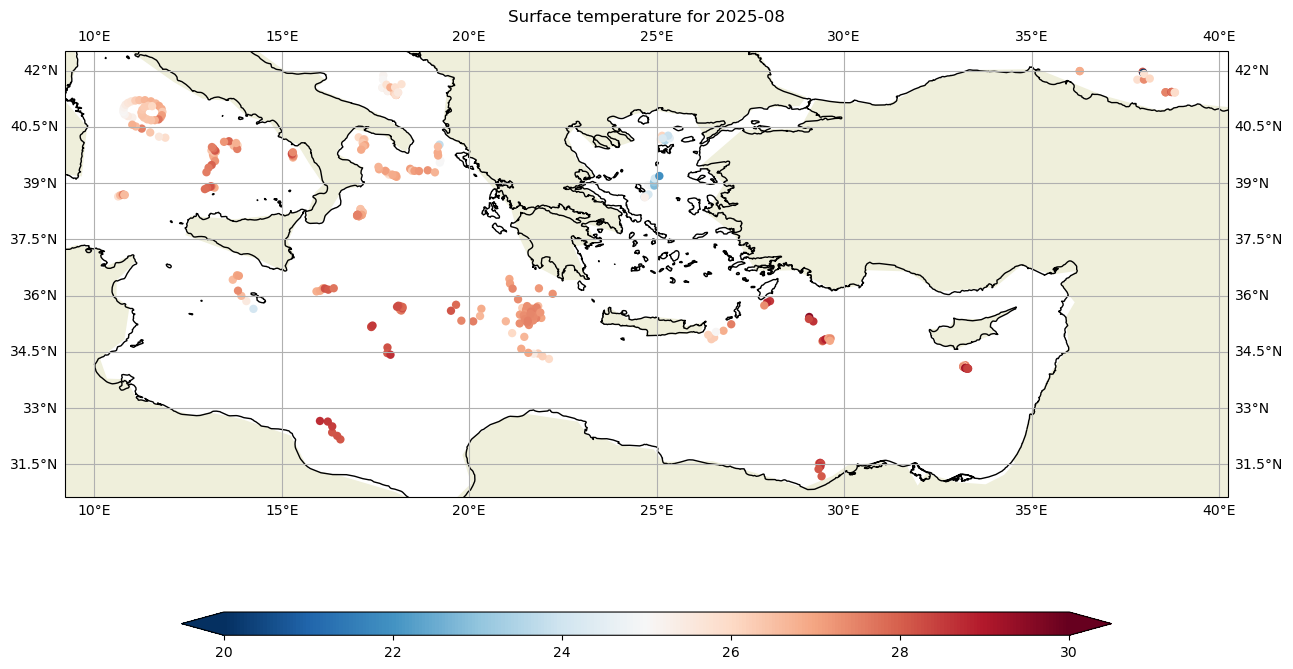

In [92]:
fig,ax = plt.subplots(figsize=(15,10),subplot_kw={'projection': ccrs.PlateCarree()})

for basin in ['atlantic_ocean']:
    for iday in range(1,31):
        filein=f"../../Data/202509-ArgoData/geo/{basin}/2025/08/202508{iday:02d}_prof.nc"
        DS=xr.open_dataset(filein)
        lon=DS.LONGITUDE.values
        lat=DS.LATITUDE.values
        tempi=np.zeros(lon.shape[0])
        tempi.fill(np.nan)
        for ip in range(0,lon.shape[0]):
            tempi[ip]=np.interp(5,DS.PRES[ip,:],DS.TEMP[ip,:])
        indice=np.where((lat>25) & (lat<42) & (lon<50) & (lon>10))
        cs=ax.scatter(lon[indice],lat[indice],c=tempi[indice],cmap="RdBu_r",vmin=20, vmax=30, edgecolor='none')

ax.set_title(f"Surface temperature for {DS.JULD[0].values.astype('datetime64[M]')}")
ax.coastlines()
ax.add_feature(cartopy.feature.LAND.with_scale('110m'))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);
ax.grid()

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='horizontal',shrink=.8,aspect=40)